<a href="https://colab.research.google.com/github/HEMA1188/linear-regression_bk/blob/main/Bangkok_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

loading CSV File

In [2]:
df=pd.read_csv("bangkok.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1821,3,65,2019-12-10,1.11,2,362,0,NaN
1,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1260,1,0,NaN,NaN,2,358,0,NaN
2,28354,Place near Metro and Shopping Mall ( Monthly o...,121848,Jaruwan,NaN,Chatu Chak,13.81152,100.56624,Entire home/apt,1159,28,52,2019-11-21,0.44,1,364,0,NaN
3,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0,NaN
4,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,NaN,Din Daeng,13.78823,100.57256,Private room,800,5,1,2016-07-13,0.02,1,365,0,NaN


In [3]:
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
17421,52941133,"8 mins to subway,-surrounding Street food & Ma...",169762534,Mai,NaN,Din Daeng,13.768813,100.568790,Private room,440,28,0,NaN,NaN,1,362,0,NaN
17422,52955580,1 bedroom,427887777,Seyedhamed,NaN,Sathon,13.717460,100.518130,Entire home/apt,2800,1,0,NaN,NaN,1,365,0,NaN
17423,52956302,1 bedroom,428043347,Maneeporn,NaN,Vadhana,13.736501,100.583707,Entire home/apt,1680,1,0,NaN,NaN,1,365,0,NaN
17424,52956705,1 bedroom,428057205,Nousone,NaN,Vadhana,13.731959,100.578503,Entire home/apt,2000,1,0,NaN,NaN,1,365,0,NaN
17425,52959118,1 bedroom,428101766,Walid,NaN,Chatu Chak,13.814130,100.577549,Entire home/apt,1600,1,0,NaN,NaN,1,365,0,NaN
17426,52959269,1 bedroom,426563287,Vinod,NaN,Khlong San,13.722971,100.503774,Entire home/apt,1600,1,0,NaN,NaN,1,365,0,NaN
17427,52960212,คอนโดสีลมสวีท สาทร12 BTS เซนต์หลุยส์,357165924,Chatchapon,NaN,Bang Rak,13.721940,100.527752,Private room,1000,1,0,NaN,NaN,2,365,0,NaN
17428,52960292,2 bedroom,426579872,Wijitta,NaN,Khlong Toei,13.705128,100.598167,Entire home/apt,2400,1,0,NaN,NaN,1,365,0,NaN
17429,52964071,"BTS Nana , Malls, Tourist hi light the Lively ...",153793,Pemika,NaN,Vadhana,13.741798,100.555090,Entire home/apt,1044,1,0,NaN,NaN,14,83,0,NaN
17430,52965453,Luxury 2-bedroom Condo in Silom with Gym & Pool,9113472,Michael,NaN,Bang Rak,13.723324,100.522339,Entire home/apt,4200,30,0,NaN,NaN,1,353,0,NaN


Descriptive Analysis of Data

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

id - id number that identifies the property

name - Property name

host_id - id number that identifies the host

host_name - Host name

neighbourhood_group - The main regions of the city

neighbourhood - The neighbourhoods

latitude - Property latitude

longitude - Property longitude

room_type - Type of the room

price - The price for one night

minimum_nights - Minimum amount of nights to book the place

number_of_reviews - Number of reviews received

last_review - Date of the last review

reviews_per_month - Amount of reviews per month

calculated_host_listings_count - Number of properties available on Bangkok owned by the host

availability_365 - Number of days of availability within 365 days

number_of_reviews_ltm- number of reviews LTM- refers the timeframe of the immediately preceding 12 months, a financial metric used to evaluate a company's performance, such as revenues or debt to equity (D/E).

In [5]:
df.shape

(17431, 18)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id                                    0
name                                  8
host_id                               0
host_name                             4
neighbourhood_group               17431
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        7107
reviews_per_month                  7107
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           17431
dtype: int64

In [12]:
print(pd.unique(df['host_id']))

[   120437    120541    121848 ... 426563287 426579872   9113472]


In [13]:
df['host_id'].value_counts()

host_id
201677068    189
39669202     120
19040245      77
52161947      73
26736483      62
            ... 
162759605      1
41546652       1
21701182       1
81365815       1
9113472        1
Name: count, Length: 7581, dtype: int64

In [14]:
print(pd.unique(df['id']))

[   27934    27979    28354 ... 52960292 52964071 52965453]


In [15]:
df['id'].value_counts()

id
27934       1
37544556    1
37569395    1
37553694    1
37552401    1
           ..
23344204    1
23344209    1
23344486    1
23344589    1
52965453    1
Name: count, Length: 17431, dtype: int64

In [34]:
# Total no of rows is 17431 and License column and neighbourhood_group has no data in all the rows so we remove fromthe data set and Id column also has all are unique values So we remove the idcolumn also

data1=df
data1.drop(['neighbourhood_group', 'id','license'], axis=1, inplace=True)
data1.head(10)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1821,3,65,2019-12-10,1.11,2,362,0
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1260,1,0,NaN,NaN,2,358,0
2,Place near Metro and Shopping Mall ( Monthly o...,121848,Jaruwan,Chatu Chak,13.81152,100.56624,Entire home/apt,1159,28,52,2019-11-21,0.44,1,364,0
3,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
4,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,800,5,1,2016-07-13,0.02,1,365,0
5,The escape Condo,153749,Waraporn,Bang Na,13.67307,100.60768,Private room,1821,1,0,NaN,NaN,1,365,0
6,Malls*BTS:E10>350m*WiFi*Clean*Flexible*Foods*Safe,153793,Pemika,Phra Khanong,13.69987,100.60164,Entire home/apt,573,1,48,2019-11-26,1.44,14,23,0
7,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1492,3,1,2014-02-03,0.01,1,365,0
8,Sathorn Terrace Apartment(61),263049,Tor,Bang Rak,13.71934,100.51760,Private room,796,2,27,2015-05-19,0.29,13,365,0
9,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.51539,Hotel room,2175,2,208,2019-12-02,1.95,13,0,0


In [35]:
data1.shape

(17431, 15)

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17431 entries, 0 to 17430
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            17423 non-null  object 
 1   host_id                         17431 non-null  int64  
 2   host_name                       17427 non-null  object 
 3   neighbourhood                   17431 non-null  object 
 4   latitude                        17431 non-null  float64
 5   longitude                       17431 non-null  float64
 6   room_type                       17431 non-null  object 
 7   price                           17431 non-null  int64  
 8   minimum_nights                  17431 non-null  int64  
 9   number_of_reviews               17431 non-null  int64  
 10  last_review                     10324 non-null  object 
 11  reviews_per_month               10324 non-null  float64
 12  calculated_host_listings_count  

In [37]:
data1.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.743100e+04,17431.000000,17431.000000,17431.000000,17431.000000,17431.000000,10324.000000,17431.000000,17431.000000,17431.000000
mean,1.386667e+08,13.744859,100.560643,2131.233779,12.051116,14.753657,0.586770,11.767598,266.157708,0.363146
std,1.097782e+08,0.043066,0.052262,6871.484717,39.394870,37.246519,0.856357,24.681086,119.224852,1.662886
min,3.141700e+04,13.527300,100.329620,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.908859e+07,13.719790,100.529305,710.500000,1.000000,0.000000,0.080000,1.000000,179.000000,0.000000
50%,1.161828e+08,13.738310,100.561910,1100.000000,1.000000,1.000000,0.250000,4.000000,358.000000,0.000000
75%,2.266199e+08,13.761070,100.586750,1900.000000,5.000000,11.000000,0.770000,10.000000,365.000000,0.000000
max,4.283521e+08,13.953540,100.923440,331104.000000,730.000000,1116.000000,23.280000,189.000000,365.000000,42.000000


In [38]:
# convert the last_review column into a datetime object

data1['last_review']=pd.to_datetime(data1['last_review'])

In [39]:
# extract the day, month, and year components
data1['day'] = data1['last_review'].dt.day
data1['month'] = data1['last_review'].dt.month
data1['year'] = data1['last_review'].dt.year

data1.head(10)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,day,month,year
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1821,3,65,2019-12-10,1.11,2,362,0,10.0,12.0,2019.0
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1260,1,0,NaT,NaN,2,358,0,NaN,NaN,NaN
2,Place near Metro and Shopping Mall ( Monthly o...,121848,Jaruwan,Chatu Chak,13.81152,100.56624,Entire home/apt,1159,28,52,2019-11-21,0.44,1,364,0,21.0,11.0,2019.0
3,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,NaN,1,365,0,NaN,NaN,NaN
4,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,800,5,1,2016-07-13,0.02,1,365,0,13.0,7.0,2016.0
5,The escape Condo,153749,Waraporn,Bang Na,13.67307,100.60768,Private room,1821,1,0,NaT,NaN,1,365,0,NaN,NaN,NaN
6,Malls*BTS:E10>350m*WiFi*Clean*Flexible*Foods*Safe,153793,Pemika,Phra Khanong,13.69987,100.60164,Entire home/apt,573,1,48,2019-11-26,1.44,14,23,0,26.0,11.0,2019.0
7,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1492,3,1,2014-02-03,0.01,1,365,0,3.0,2.0,2014.0
8,Sathorn Terrace Apartment(61),263049,Tor,Bang Rak,13.71934,100.51760,Private room,796,2,27,2015-05-19,0.29,13,365,0,19.0,5.0,2015.0
9,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.51539,Hotel room,2175,2,208,2019-12-02,1.95,13,0,0,2.0,12.0,2019.0


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17431 entries, 0 to 17430
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            17423 non-null  object        
 1   host_id                         17431 non-null  int64         
 2   host_name                       17427 non-null  object        
 3   neighbourhood                   17431 non-null  object        
 4   latitude                        17431 non-null  float64       
 5   longitude                       17431 non-null  float64       
 6   room_type                       17431 non-null  object        
 7   price                           17431 non-null  int64         
 8   minimum_nights                  17431 non-null  int64         
 9   number_of_reviews               17431 non-null  int64         
 10  last_review                     10324 non-null  datetime64[ns]
 11  re

In [41]:
# check unique values of Name, room type , host_name and neighbourhood
print(pd.unique(data1['name']))

['Nice room with superb city view' 'Easy going landlord,easy place'
 'Place near Metro and Shopping Mall ( Monthly only)' ... '2 bedroom'
 'BTS Nana , Malls, Tourist hi light the Lively road'
 'Luxury 2-bedroom Condo in Silom with Gym & Pool']


In [42]:
data1['name'].value_counts()

name
New!  La Chada Night Market studio 2PPL near MRT      46
New!  La Chada Night Market 1BR 2PPL near MRT         36
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)    36
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS    25
1 MINS WALK TO BTS//INFINITY POOL//GREAT VIEW         21
                                                      ..
1分钟到BTS (1min to BTS) 51                               1
1分钟到BTS (1min to BTS) 52                               1
1分钟到BTS (1min to BTS) 53                               1
Happy Pool Terrace Donmuang Airport                    1
Luxury 2-bedroom Condo in Silom with Gym & Pool        1
Name: count, Length: 16374, dtype: int64

In [49]:
print(pd.unique(data1['host_name']))

['Nuttee' 'Emy' 'Jaruwan' ... 'Walid' 'Vinod' 'Wijitta']


In [50]:
data1['host_name'].value_counts()

host_name
Curry       189
Rfh         120
Bee          88
Nicha        79
Noons        73
           ... 
Honeybee      1
Kobe          1
Taweerat      1
Kesaree       1
Wijitta       1
Name: count, Length: 5920, dtype: int64

In [43]:
print(pd.unique(data1['neighbourhood']))

['Ratchathewi' 'Bang Na' 'Chatu Chak' 'Bang Kapi' 'Din Daeng'
 'Phra Khanong' 'Rat Burana' 'Bang Rak' 'Sathon' 'Bang Phlat' 'Phaya Thai'
 'Khlong Toei' 'Lat Krabang' 'Yan na wa' 'Vadhana' 'Huai Khwang'
 'Nong Chok' 'Parthum Wan' 'Khlong San' 'Bang Kho laen' 'Bang Khen'
 'Bang Sue' 'Samphanthawong' 'Suanluang' 'Saphan Sung' 'Min Buri'
 'Sai Mai' 'Bangkok Yai' 'Phasi Charoen' 'Phra Nakhon' 'Don Mueang'
 'Lak Si' 'Dusit' 'Bueng Kum' 'Pra Wet' 'Wang Thong Lang' 'Khan Na Yao'
 'Chom Thong' 'Khlong Sam Wa' 'Lat Phrao' 'Thon buri' 'Bang Khae'
 'Bangkok Noi' 'Pom Prap Sattru Phai' 'Nong Khaem' 'Thawi Watthana'
 'Thung khru' 'Bang Khun thain' 'Taling Chan' 'Bang Bon']


In [44]:
data1['neighbourhood'].value_counts()

neighbourhood
Khlong Toei             2209
Vadhana                 2125
Huai Khwang             1310
Ratchathewi             1271
Bang Rak                 997
Sathon                   801
Phra Nakhon              705
Phra Khanong             626
Chatu Chak               556
Bang Na                  544
Din Daeng                529
Phaya Thai               504
Parthum Wan              489
Khlong San               466
Suanluang                410
Bang Kapi                284
Bang Sue                 238
Thon buri                237
Lat Krabang              234
Bang Phlat               233
Yan na wa                212
Don Mueang               189
Phasi Charoen            174
Pra Wet                  165
Bangkok Noi              156
Pom Prap Sattru Phai     155
Bang Kho laen            145
Wang Thong Lang          142
Samphanthawong           138
Bang Khen                135
Lak Si                   130
Bang Khae                102
Bangkok Yai               99
Dusit                     97


In [45]:
print(pd.unique(data1['room_type']))

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [46]:
data1['room_type'].value_counts()

room_type
Entire home/apt    9549
Private room       6271
Hotel room          944
Shared room         667
Name: count, dtype: int64

In [51]:
data1.isnull().sum()

name                                 8
host_id                              0
host_name                            4
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7107
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
day                               7107
month                             7107
year                              7107
dtype: int64

Handling null values

In [47]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy="mean")

# Impute missing values in the numerical columns
data1["reviews_per_month"] = imputer.fit_transform(data1[["reviews_per_month"]])

In [52]:
bangkok_data=data1
bangkok_data.drop(['name','host_name'], axis=1, inplace=True)
bangkok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17431 entries, 0 to 17430
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         17431 non-null  int64         
 1   neighbourhood                   17431 non-null  object        
 2   latitude                        17431 non-null  float64       
 3   longitude                       17431 non-null  float64       
 4   room_type                       17431 non-null  object        
 5   price                           17431 non-null  int64         
 6   minimum_nights                  17431 non-null  int64         
 7   number_of_reviews               17431 non-null  int64         
 8   last_review                     10324 non-null  datetime64[ns]
 9   reviews_per_month               17431 non-null  float64       
 10  calculated_host_listings_count  17431 non-null  int64         
 11  av

In [53]:
# mapping room_type column

mapping = {'Entire home/apt': 1,'Private room': 2,'Hotel room': 3,'Shared room':4}
bangkok_data['room_type'] = bangkok_data['room_type'].map(mapping)

In [55]:
len(bangkok_data['neighbourhood'].unique())

50

Data Visualization

In [57]:
bk_data=bangkok_data
bk_data.drop(['neighbourhood','last_review'], axis=1, inplace=True)
bk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17431 entries, 0 to 17430
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         17431 non-null  int64  
 1   latitude                        17431 non-null  float64
 2   longitude                       17431 non-null  float64
 3   room_type                       17431 non-null  int64  
 4   price                           17431 non-null  int64  
 5   minimum_nights                  17431 non-null  int64  
 6   number_of_reviews               17431 non-null  int64  
 7   reviews_per_month               17431 non-null  float64
 8   calculated_host_listings_count  17431 non-null  int64  
 9   availability_365                17431 non-null  int64  
 10  number_of_reviews_ltm           17431 non-null  int64  
 11  day                             10324 non-null  float64
 12  month                           

In [60]:
bk_data=bk_data[bk_data['price']!=0]

In [61]:
zero_price=bk_data[bk_data['price']==0].count()['price']
print(zero_price)

0


array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'room_type'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

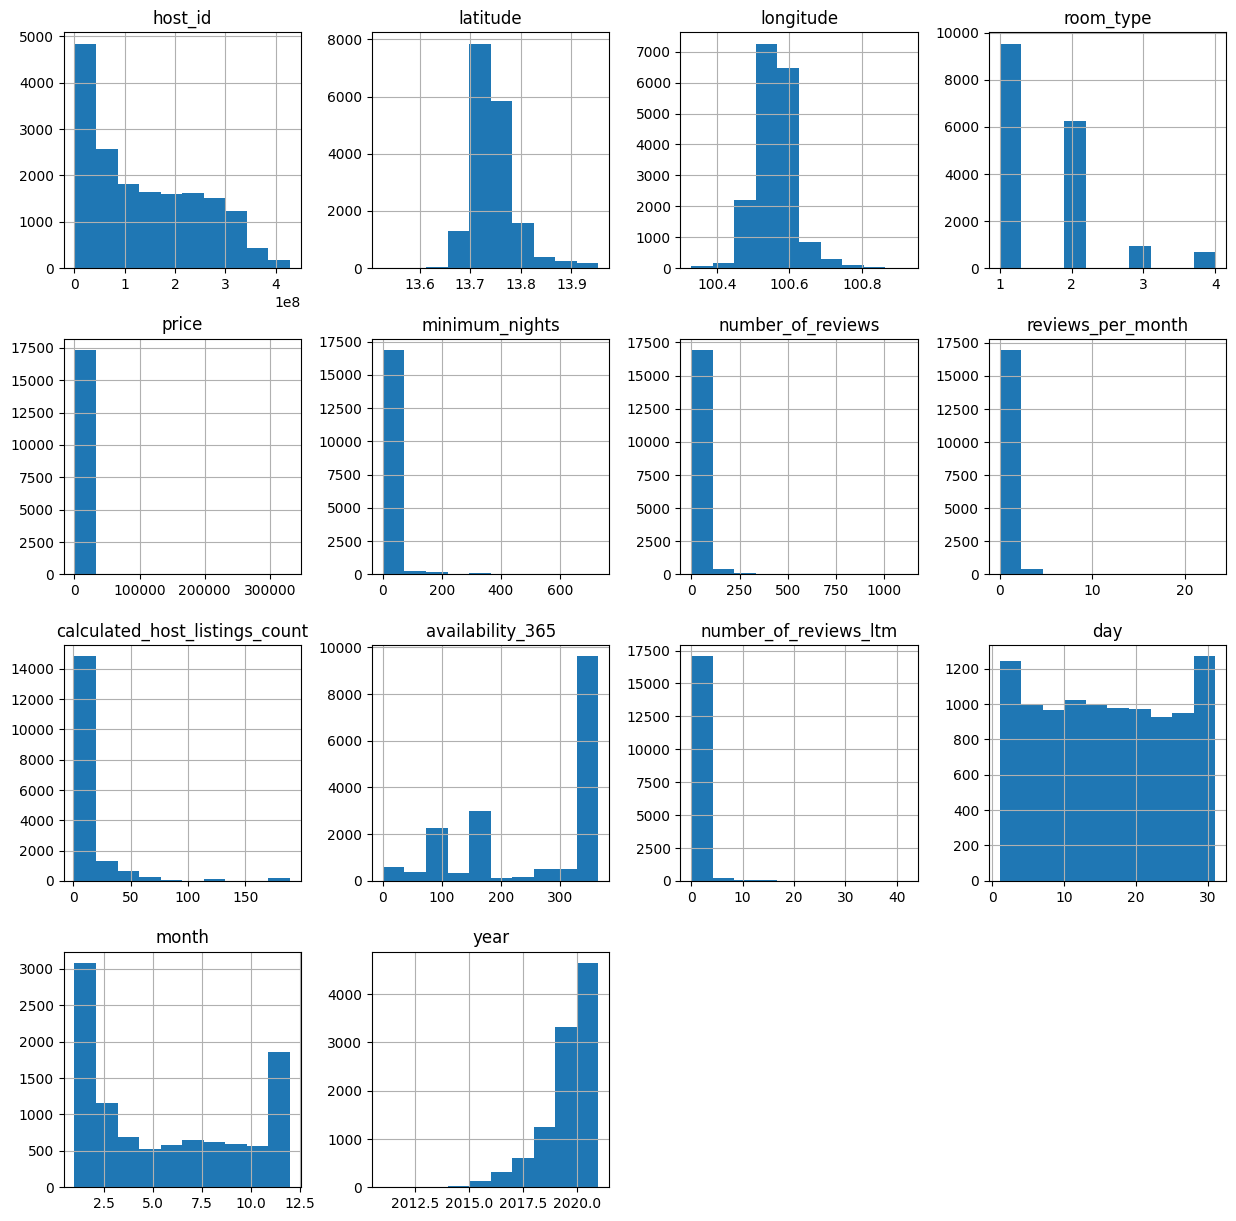

In [58]:
bk_data.hist(figsize=(15, 15))

<Axes: >

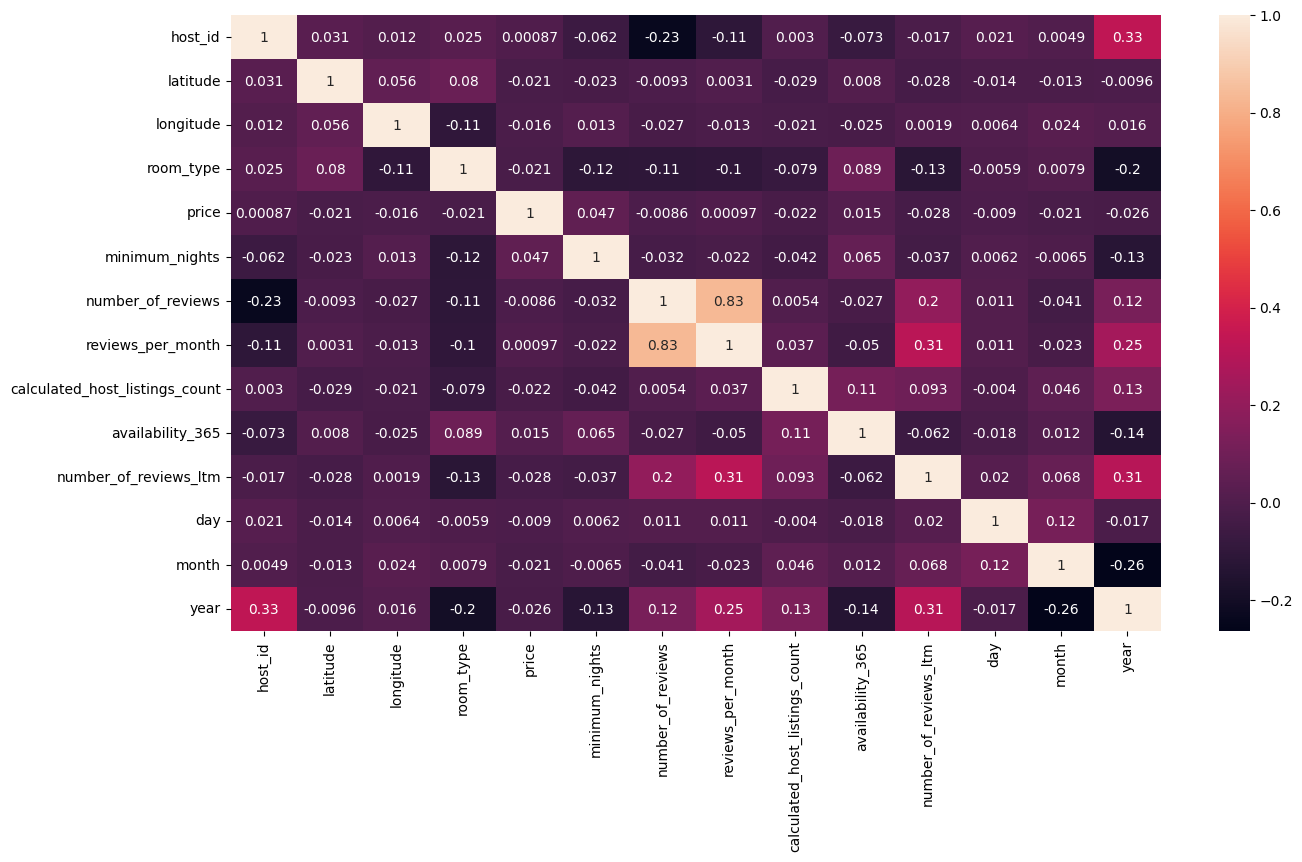

In [59]:
plt.figure(figsize=(15, 8))
sns.heatmap(bk_data.corr(), annot=True)

In [ ]:
#countplot and scatterplot for room types

sns.countplot(bk_data['room_type'], palette='plasma')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

print("lets compare the room type effecto on the price")









In [ ]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type',y='price',data=bk_data)

plt.xlabel("room type", size=13)
plt.ylabel("price", size=13)
plt.title(" Room type vs Price", size=15)
plt.show()